<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Churn%2BSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Predictivo y de Supervivencia a una empresa de Telecomunicaciones (TELECOM)**

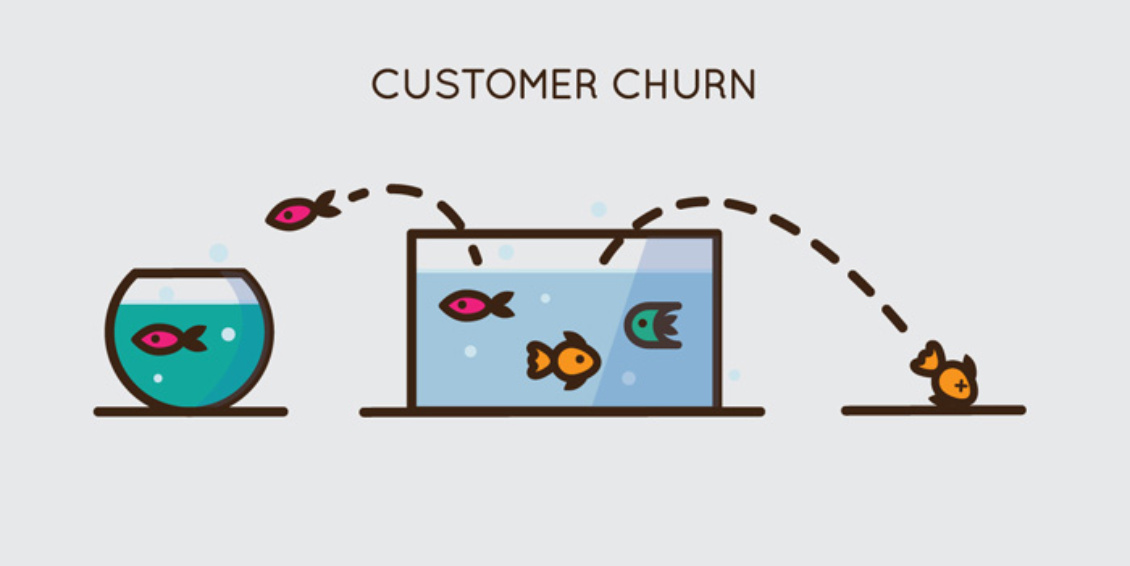

**Presentado por: Jesús Laura Balbín**

Basado en el documento de investigación "Determinantes de la migración de deudores de consumo en el sistema financiero peruano" publicado en la Revista de Temas Financieros / Journal of Financial Issues SBS

**1. Problematica Identificado y Marco Metodologico**

La retención de clientes está recibiendo cada vez mayor atención por parte de empresas, especialmente por parte de aquellas que operan en mercados relativamente saturados (mercados financieros, retail, sector de telecomunicaciones). En industrias con un mayor nivel de penetración, la competencia se hace más intensa debido a que las empresas buscan atraer a clientes de las empresas competidoras mediante incentivos comerciales (promociones). En este contexto, el desarrollo de una relación con los clientes es un factor crítico para las empresas que buscan permanecer en la industria y aumentar sus ganancias en el segmento de mercado en el que participan (Van den Poel y Larivière, 2004). El ciclo de vida del cliente (ver Figura N° 1) inicia cuando las empresas realizan campañas de marketing dirigidas a determinado mercado, con el objetivo de generar interés en el producto o en el servicio que ofrecen. Si la persona responde positivamente a la oferta comercial, se convierte en consumidor. Los consumidores se convierten en clientes cuando hacen uso habitual del producto o servicio, debido a que poseen una relación con la empresa a través de un contrato. Posteriormente, el valor de los clientes se puede incrementar a través de incentivos para que los clientes compren más productos o servicios (técnicas cross-selling) o adquieran productos o servicios de mayor valor para la empresa (up-selling).

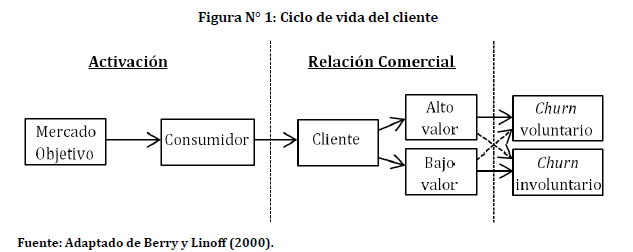

Por otro lado, algunos clientes dejan de serlo; a esto se le conoce en la literatura como churn y se distingue entre churn voluntario y churn involuntario. El churn voluntario se produce debido a una decisión por parte del cliente de cambiarse a otra entidad; en tanto, el churn involuntario, como lo indica su nombre, se produce debido a circunstancias involuntarias. La mayoría de investigaciones se concentran en el churn voluntario, ya que este normalmente se produce debido a factores que influyen en la relación empresa-cliente, y sobre los cuales las empresas tienen control, como por ejemplo, la calidad del servicio o las condiciones comerciales.

**Frente a ello utilizaremos tecnicas de machine learning para predecir el churn de clientes de la empresa TELECOM y con un plus del analisis de sobrevivencia (survival analysis) podremos identificar que factores aceleran la probabilidad de churn (abandono) de cada grupo de clientes.**

**2. Base de Datos**

La base de datos usadas en este trabajo es obtenida del repositorio de Kagle, es una base de clientes que pertenence a la empresa TELECOM la cual cuenta con 21 variables. Se detalla cada una en la siguiente tabla.

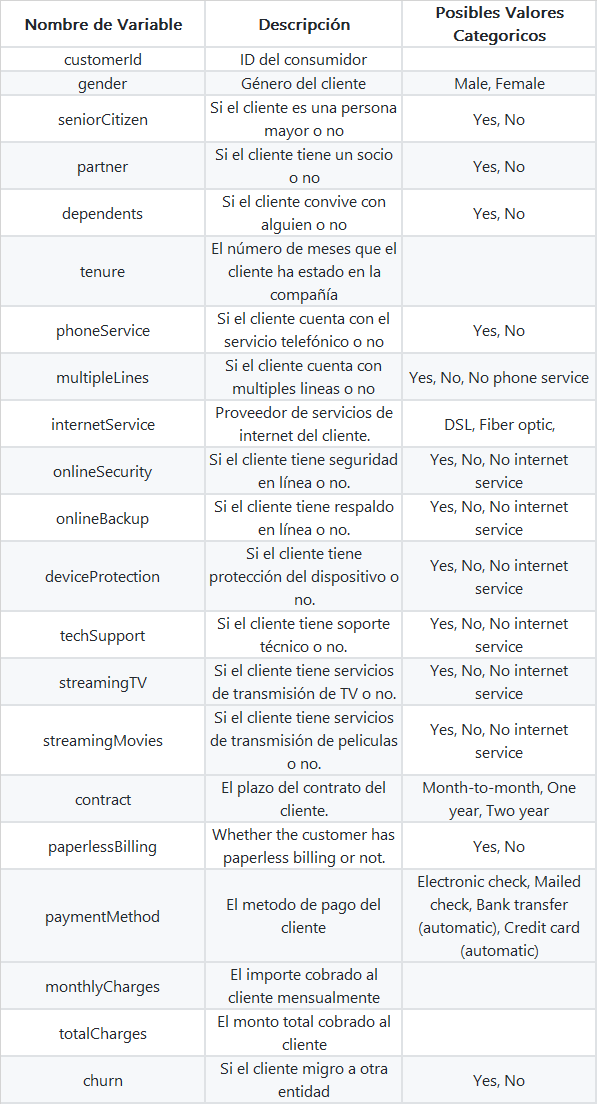

**3. Analisis Descriptivo**

**3.1. Packages**

In [ ]:
#Cargamos las librerias o paquetes en el cual realizaremos todo el analisis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams

**3.2. Base de Datos**

3.2.1.   Calidad de los Datos y Preparación de Datos








In [ ]:
url = 'https://raw.githubusercontent.com/JLaura011/Business-Analytics/master/Telco-Customer-Churn.csv'
data = pd.read_csv(url)

In [ ]:
#Calculamos el tamaño de la data y el número de columnas
print('The dataset has', data.shape[0] , 'rows and', data.shape[1], 'columns.')

The dataset has 7043 rows and 21 columns.


In [ ]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6510,0572-ZJKLT,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.2,No
4909,3720-DBRWL,Male,0,Yes,No,51,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),83.85,4307.1,No
5671,6370-ZVHDV,Female,0,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.30,1554.9,No
5245,5902-WBLSE,Female,0,Yes,Yes,70,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.15,1411.2,No
3021,6377-KSLXC,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,107.05,No


In [ ]:
# Relabel de los valores de la variable Senior Citizen
data.SeniorCitizen = data.SeniorCitizen.map({1: 'Yes', 0: 'No'})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2212,8076-FEZKJ,Male,No,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,225.85,No
3721,2839-RFSQE,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,38.7,Yes
5749,3349-ANQNH,Female,Yes,No,No,59,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.50,5890,No
4371,3372-CDXFJ,Male,No,Yes,Yes,13,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.50,343.6,No
4889,9746-MDMBK,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.45,5317.8,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Como muchas respuestas son categoricas, buscaremos algunos errores lógicos en el conjunto de datos
#¿Existen registros duplicados? Aseguremos que solo exista un ID para cada observacion de la data
print('Number of rows with duplicated customerID:', data[data.groupby('customerID')['customerID'].transform('size') > 1].shape[0]) 


Number of rows with duplicated customerID: 0


In [ ]:
#Eliminados Customer ID debido a que no es una variable relevante para el analisis predictivo, 
#Del mismo modo este drop evitará cualquier error al hacer el analisis de corrrelación
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#De la base de datos observamos que muchos variables son categóricas o de respuesta binaria (YES-NO)
#Convertiremos los valores categóricos en valores numéricos para facilitar los algoritmos de machine learning para procesar los datos,asimismo
#para detectar valores missing ya que para datos tipo string no existe el missing count
#También convertiremos la variable Total Charges en numérica.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Del resultado anterior, se puede ver que hay 11 valores faltantes para los cargos totales. Imputaremos estos 11 valores faltantes. Asimismo convertiremos la variable predictora churn en variable numérica de respuesta binaria

In [ ]:
df.dropna(inplace = True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
# convirtiendo todas las variables categoricas en variables dummy (nùmericas)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_No                         7032 non-null   uint8  
 7   SeniorCitizen_Yes                        7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

**3.3. Analisis Exploratorio de Datos (EDA)**

**3.3.1. Correlaciones entre las características del cliente y el churn**

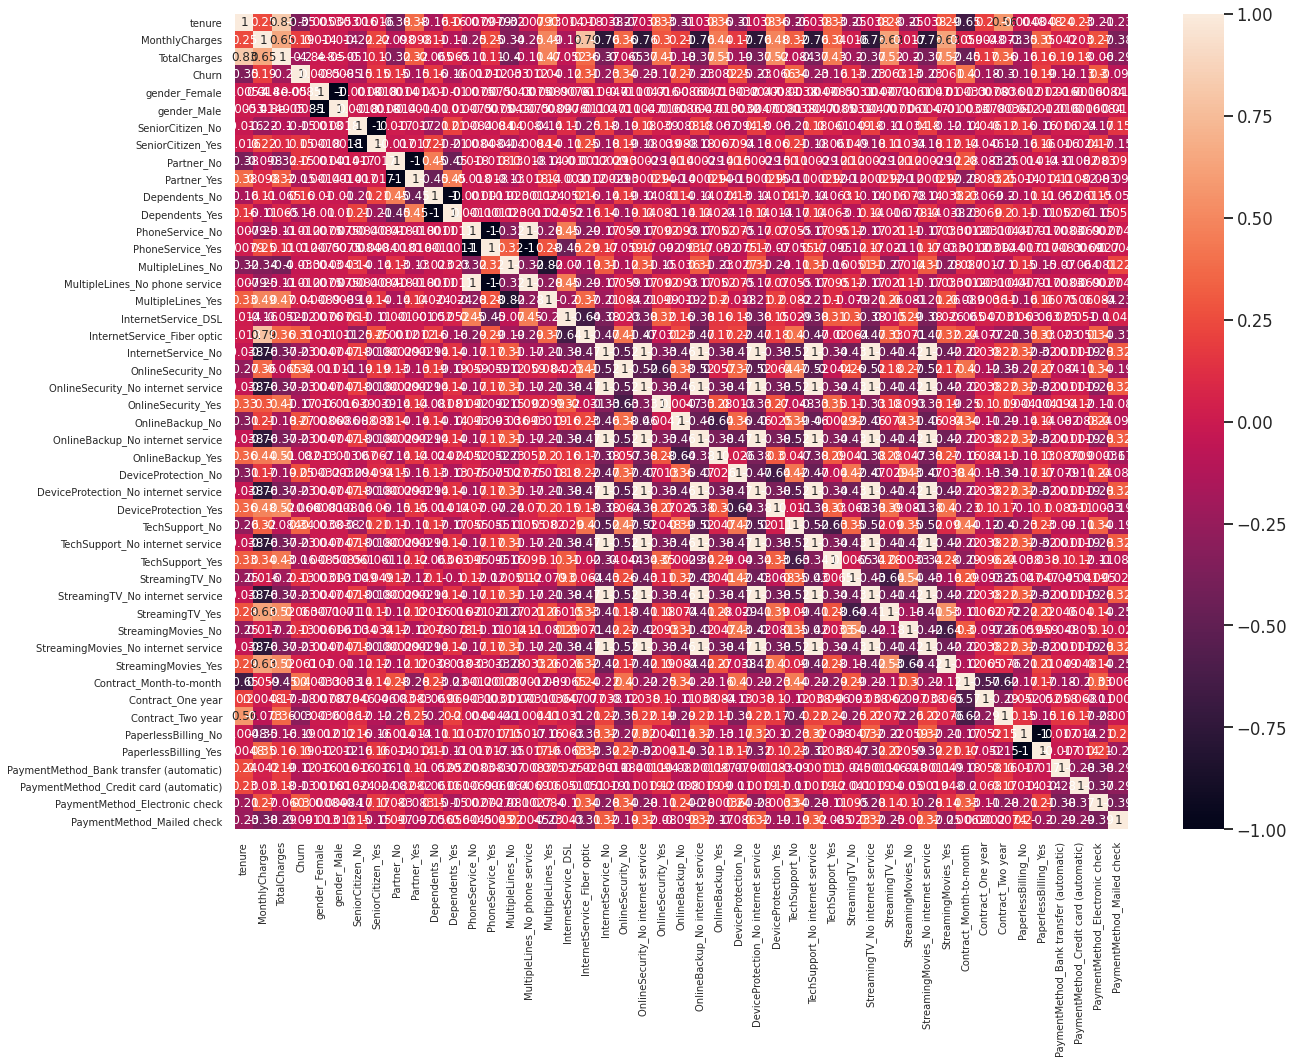

In [ ]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df_dummies.corr()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen_No,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,0.136377,0.008392,-0.142996,0.108276,-0.254923,0.182519,-0.185145,0.182519,0.038576,-0.087539,0.182519,-0.066663,-0.094403,0.

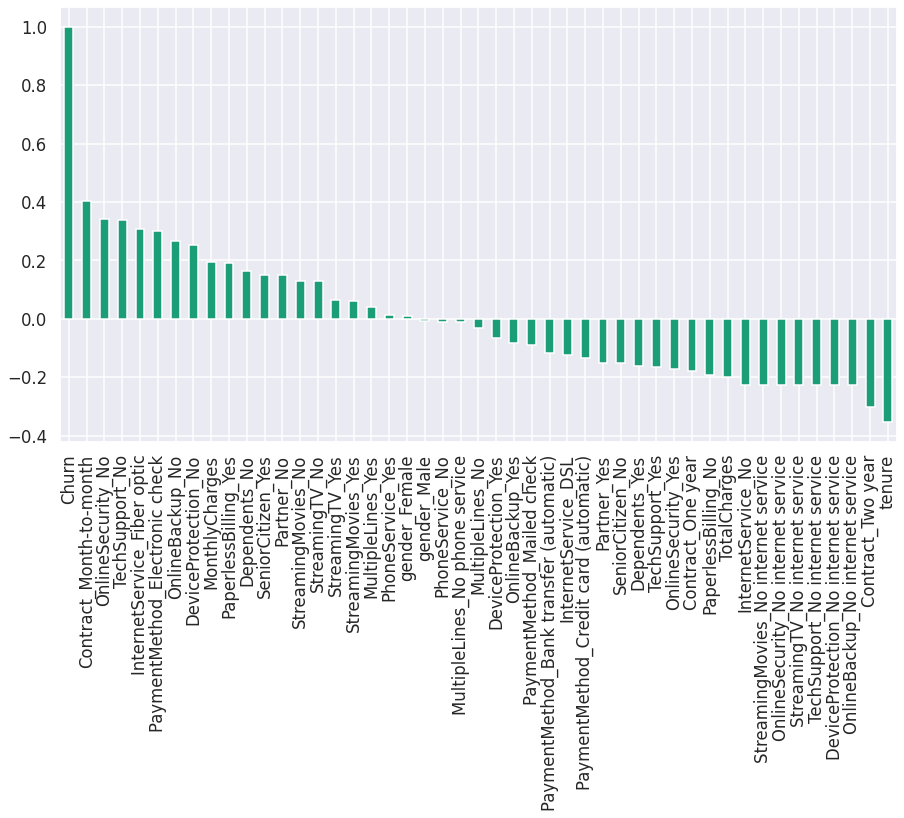

In [ ]:
# Como la variable de intereses es churn (variable predictiva), podemos ver que otras variables estan correlacionadas con esta
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Se puede ver desde el diagrama de correlación anterior que, Contract_Month-to-month, Online security_No, Tech Support_No, etc. están positivamente correlacionados con Churn. Mientras que, en el otro extremo de la trama, tenencia, Contrato_Dos años, InternetService_No, etc. están negativamente correlacionados con Churn. Curiosamente, servicios como Seguridad en línea, StreamingTV, OnlineBackup, TechSupport, InternetService_No parecen estar relacionados negativamente con Churn. Es necesario explorar más los patrones para las correlaciones anteriores a continuación antes de modelar e identificar las variables importantes.

 **3.3.2. Perfil socio-demografico de los clientes (género, si es jovén, entre otros)**

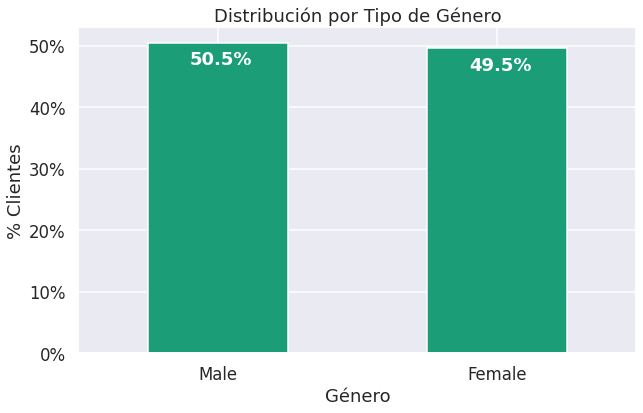

In [ ]:
import matplotlib.ticker as mtick # Para especificar el formato de ejes de los graficos combinados
rcParams['figure.figsize']=10,6
#Las siguientes lineas de codigo muestra el calculo de % de clientes por género
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clientes')
ax.set_xlabel('Género')
ax.set_ylabel('% Clientes')
ax.set_title('Distribución por Tipo de Género')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

El gráfico anterior muestra un % casi igual de clientes mujeres y varones (homogenidad de la muestra), siendo el caso que el 50.5% (3557) son clientes varones, mientras que el otro 49.5% (3486) son mujeres. 

Text(0.5, 1.0, '% de Ciudadanos Mayores')

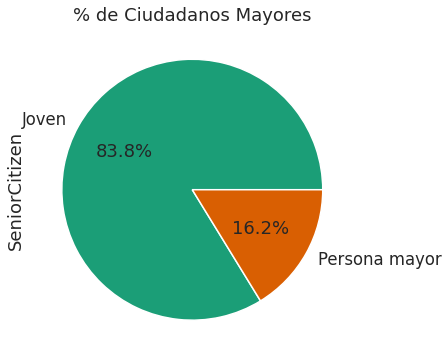

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Joven', 'Persona mayor'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% de Ciudadanos Mayores')


Este gráfico de pastel muestra un 16.2% (1141)de clientes de la tercera edad (senior).y el resto 83.8% (5902) son jovenes, lo que evidencia que la mayor parte de cliente son de este grupo etario. La base de datos ya tenia una clasificación ex-ante para la variable edad, por lo que no es posible realizar un analisis de agrupación o conteo por rangos etarios.

**3.3.3. Tiempo de Vida del Cliente (Customer Life Time Value)**

Text(0.5, 1.0, 'Tiempo de Vida de Clientes (Permanencia)')

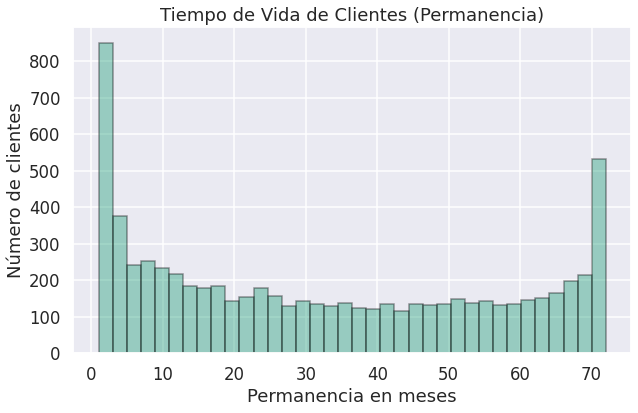

In [ ]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Número de clientes')
ax.set_xlabel('Permanencia en meses')
ax.set_title('Tiempo de Vida de Clientes (Permanencia)')

El histograma anterior muestra que muchos clientes han estado con la compañía de telecomunicaciones durante solo un mes, mientras que otro grupo de clientes cerca a 550, permanecen en la empresa durante aproximadamente 70 meses. Este insight podria deberse a los diferentes acuerdos contractuales que mantienen los clientes.

**3.3.4. Número de Clientes Tipo de Contrato**

Text(0.5, 1.0, 'Número de clientes por tipo de contrato')

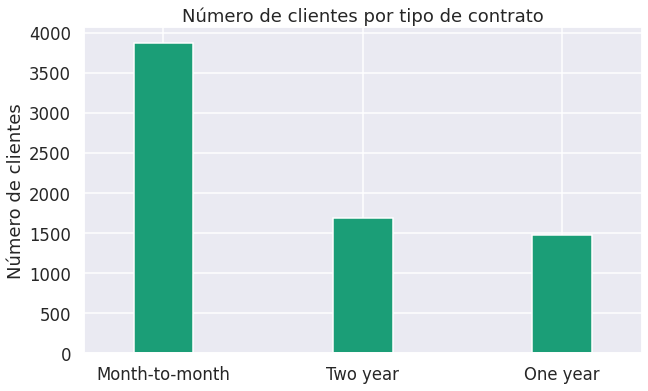

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Número de clientes')
ax.set_title('Número de clientes por tipo de contrato')

De la gráfica podemos observar que la mayoria de clientes tienen contratos mes a mes (1 a 2 meses) luego de esto pueden seguir en la empresa por mejores promociones o simplemente salir (churn), la otra cara de la moneda es los contratos de 1 año o 2 años, esto de cierta forma asegura la fidelidad de los clientes y la retención de los mismos por ese periodo, podemos resumir ello a través de la siguiente frase **"los clientes que toman un contrato más largo son más leales a la empresa y tienden a quedarse con él durante un período de tiempo más largo".**

Text(0.5, 1.0, 'Contrato de dos años')

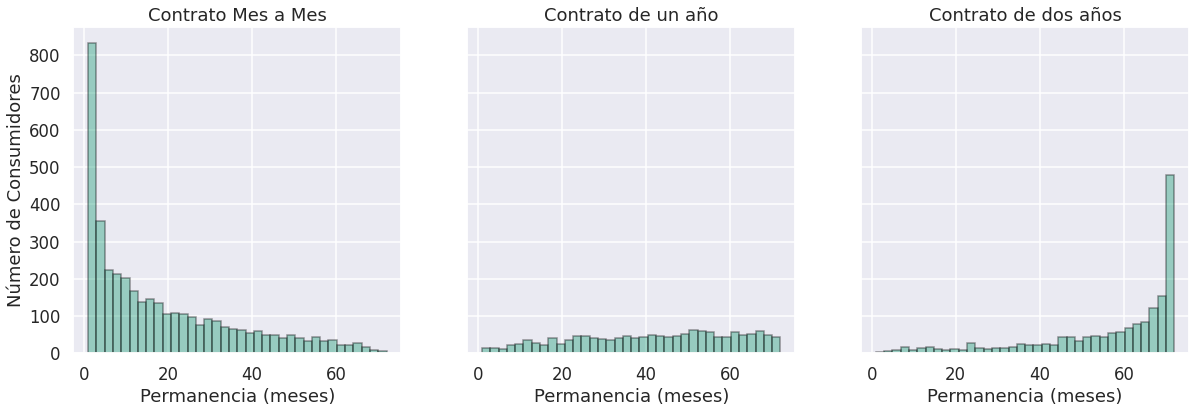

In [ ]:
#Creamo el espacio para añadir 03 gráficos apilados
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Número de Consumidores')
ax.set_xlabel('Permanencia (meses)')
ax.set_title('Contrato Mes a Mes')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Permanencia (meses)')
ax.set_title('Contrato de un año')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Permanencia (meses)')
ax.set_title('Contrato de dos años')

Reforzando el gráfico anterior, hay un gran número de clientes con contratos de 01 meses y con contrato de 02 años, su permanencia parece estar relacionada directamente con el tiempo del contrato.


**3.3.5. Número de clientes según servicios utilizados**

In [ ]:
#Identificamos las variables de servicios del conjunto de datos
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

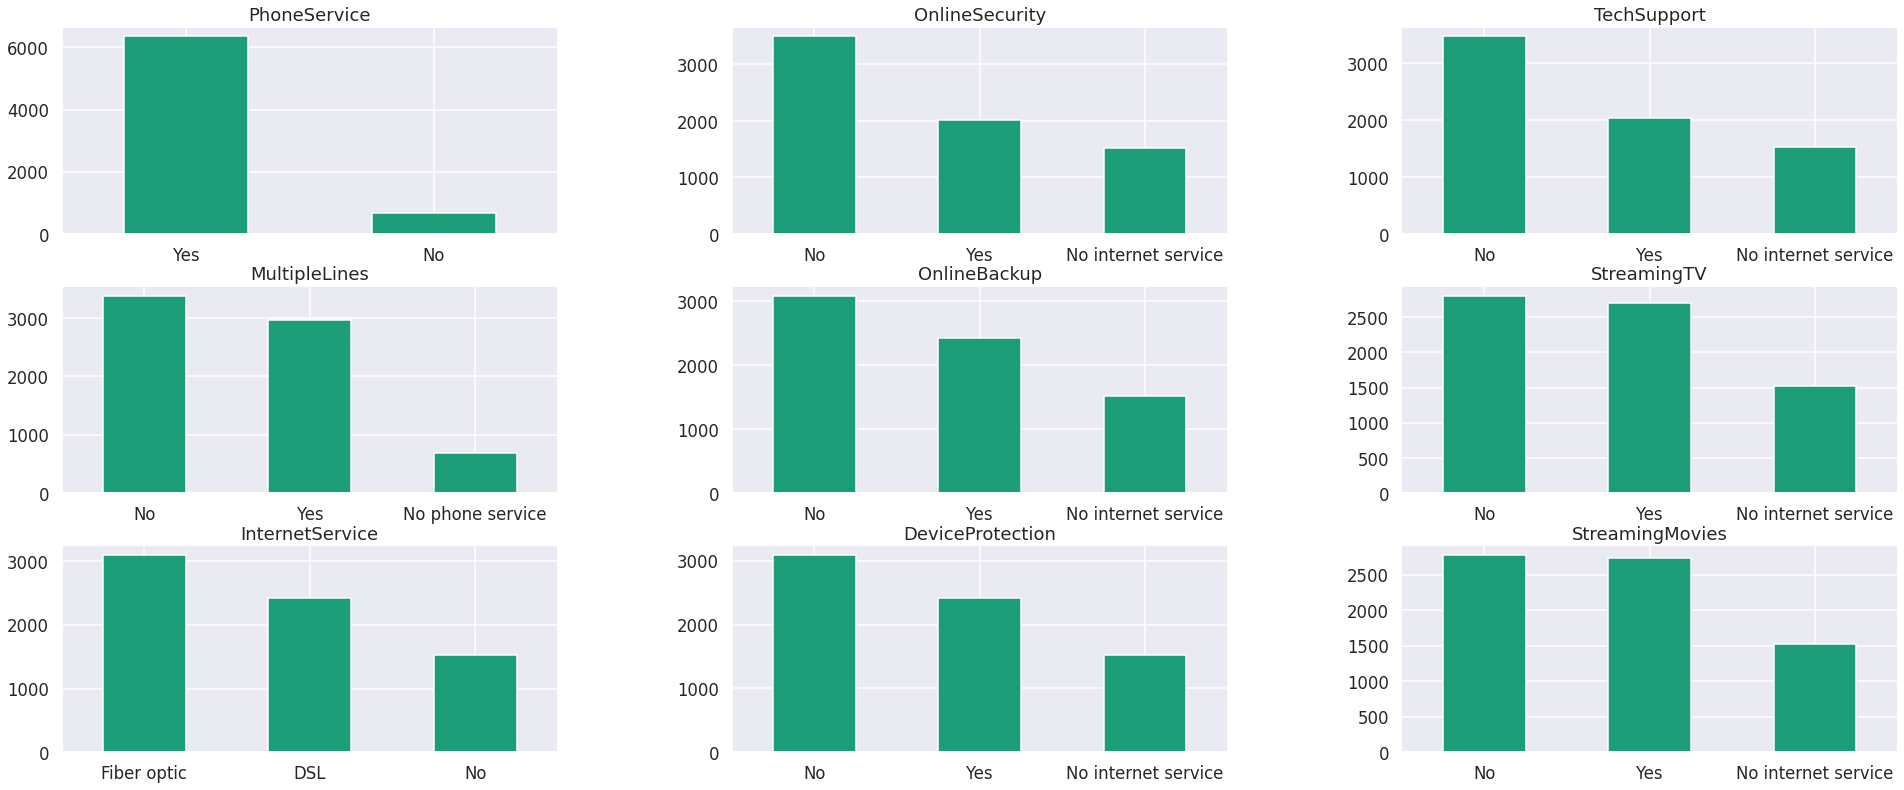

In [ ]:
#Creamos una lista de las variables servicios
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#Creamos el gráfico del número de clientes agrupados por cada servicio
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (30,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
#Ajustamos el gráfico
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


El gráfico anterior muestra una clara visibilidad de los diferentes servicios proporcionados por la compañía de telecomunicaciones y disponibles por los clientes.

**3.3.6. Variable Predictora (Churn Rate)**

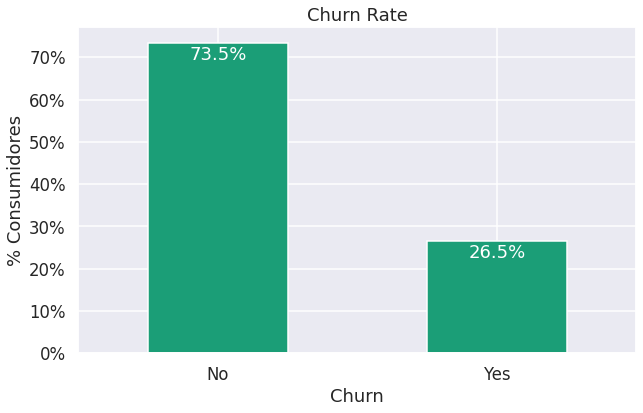

In [ ]:
#Creamos la tasa de retención en base a la variable churn
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Consumidores')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

La tasa de abandono es de 26.5% (1869 clientes), el 73.5% (5163) de los clientes aun se mantiene en la empresa. De esta caracteristica se puede identificar que los datos están sesgados o forzados, esta asimetría podría generar muchos falsos negativos en el modelado predictivo.

**3.3.7. Relación entre el churn rate y los cargos mensuales (tarifas)**

Text(0, 0.5, 'Cargas (Tarifas) Mensuales')

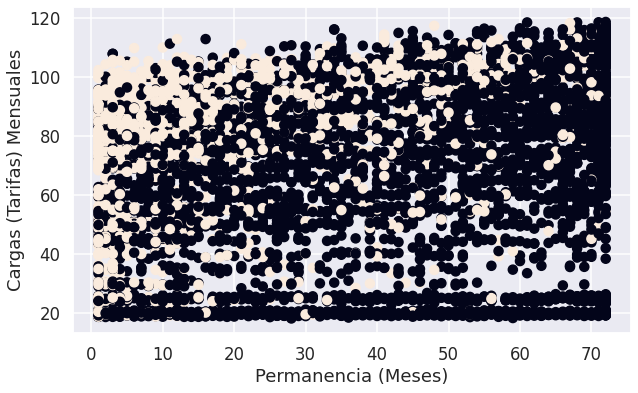

In [ ]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Permanencia (Meses)')
plt.ylabel('Cargas (Tarifas) Mensuales')

Es difícil sacar conclusiones de esta visualización que compara la tenencia del cliente con sus cargos mensuales. Sin embargo, a partir de la siguiente trama, se puede ver claramente que, los clientes que no abandonan, tienden a permanecer por más tiempo en la empresa de telecomunicaciones.

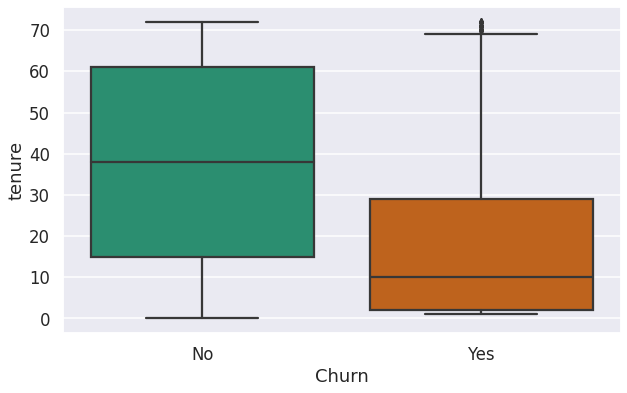

In [ ]:
sns.boxplot(x = data.Churn, y = data.tenure)

**3.3.8. Relación entre el churn rate y el tipo de contrato**

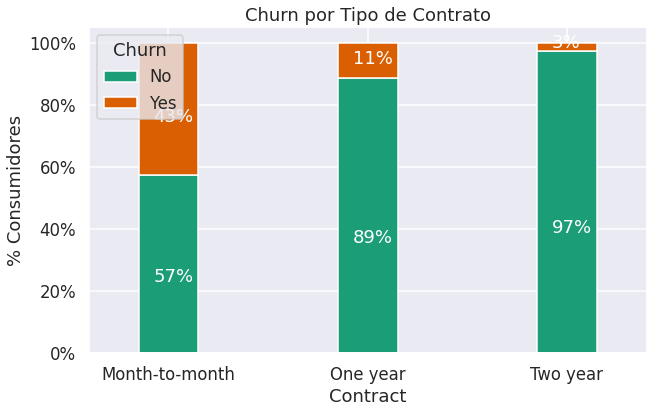

In [ ]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0)                                                     
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Consumidores')
ax.set_title('Churn por Tipo de Contrato')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

La gráfica anterior muestra que los clientes que tienen un contrato mensual tienen una tasa de rotación (churn rate) muy alta. Esto proporciona una valiosa aportación al departamento de ventas / marketing.

**3.3.9. Relación entre el churn rate y el gruto etario al que pertenecen los clientes**

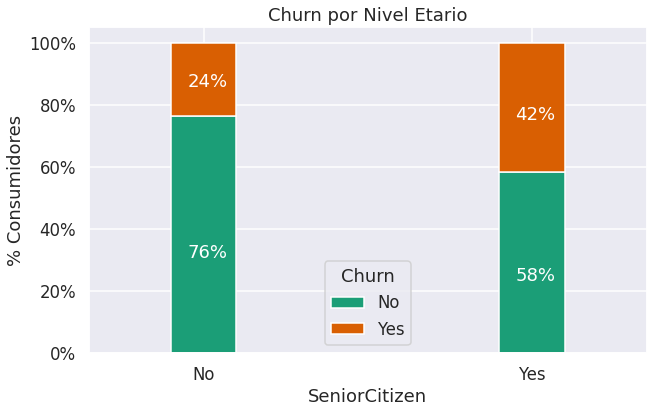

In [ ]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Consumidores')
ax.set_title('Churn por Nivel Etario')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')

Del gráfico anterior, es aparente que los ciudadanos mayores tienen casi el doble de la tasa de rotación que la población más joven. Para explorar la razón, se dibujó la siguiente gráfica que muestra claramente un mayor porcentaje de clientes que abandonan cuando los cargos mensuales son altos. Esto también incluye a los ciudadanos mayores.

Text(0.5, 1.0, 'Distribución de cargos mensuales (tarifas) por churn')

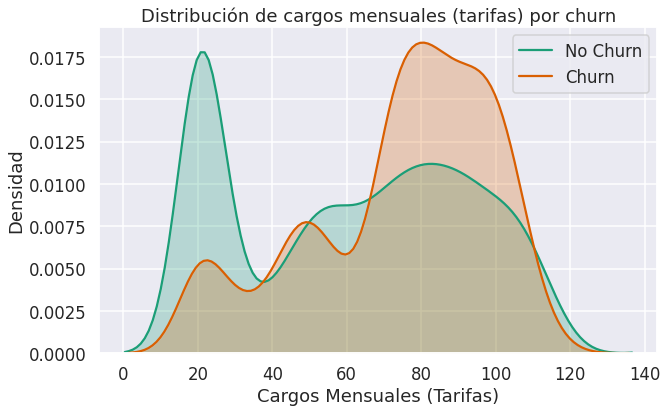

In [ ]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["No Churn","Churn"], loc='best')
ax.set_ylabel('Densidad')
ax.set_xlabel('Cargos Mensuales (Tarifas)')
ax.set_title('Distribución de cargos mensuales (tarifas) por churn')

**4. Analisis Predictivo**

Consideraremos un conjunto de prueba representando el 20% del total de los datos. Asimismo es importante realizar un rescalamiento de las variables para que todas estén dentro de un rango de 0 a 1. La regresión logística a utilizar para predecir la variable dicotomica churn, requiere que haya poca o ninguna multicolinealidad entre las variables independientes. Por lo tanto,se eliminarán los cargos totales. ¿Por que cargos totales? Como se observa de la base de datos cargos totales es una combinación lineal de monthy charges (total charges = monthly charges * number of monthly), por lo que es un claro problema de multicolinealidad.

In [ ]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removiendo la variable total charges
# Separamos las variables del modelo
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
# Re-escalamos (normalizamos) las varibles entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


**4.1. Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [ ]:
print('Intercept: ' + str(result.intercept_)) 
print('Regression: ' + str(result.coef_)) 

Intercept: [-0.89418018]
Regression: [[-2.43967348 -0.00714749  0.01487127 -0.01487162 -0.09397795  0.09397761
   0.01066612 -0.01066646  0.11052089 -0.11052123  0.11733283 -0.11733317
  -0.17018771  0.11733283  0.05285454 -0.45941931  0.56499648 -0.10557751
   0.2249757  -0.10557751 -0.11939853  0.11825073 -0.10557751 -0.01267356
   0.04803012 -0.10557751  0.05754705  0.22535299 -0.10557751 -0.11977582
  -0.08882168 -0.10557751  0.19439885 -0.08919914 -0.10557751  0.19477631
   0.62138008 -0.04355298 -0.57782744 -0.15446854  0.15446819 -0.03629403
  -0.15975105  0.24575432 -0.04970958]]


**4.2. Matriz de Confusión**

Matriz de Confusión
[[937  96]
 [183 191]]


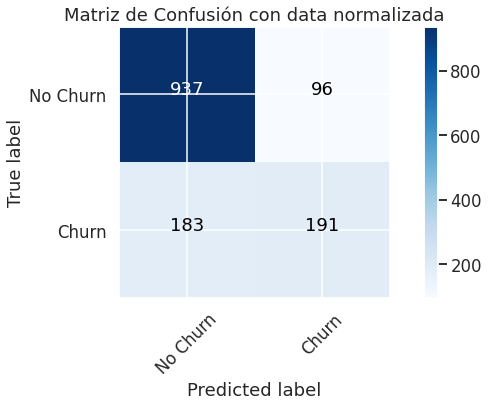

In [ ]:
import itertools
#Evaluación del modelo y el Plot de la Matriz de Confusión
def plot_confusion_matrix(cm, classes, title ='Matriz de Confusión', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
#Calculando la matriz de confusión
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)
#Plot de la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Matriz de Confusión con data normalizada')
  

La precisión (accuracy) del modelo es del 80%. Sin embargo, a veces puede no ser la medida correcta, cuando los datos están sesgados (el desbalance del % de churn de los clientes).

Como el objetivo de toda empresa es conocer a cada uno de los clientes que estan propensos a abandonar (churn) y cuánta información puede generarse, a fin de poder reducir la rotación y tomar las medidas preventivas correctas a tiempo, es necesario verificar qué variables independientes tienen la mayor influencia en el resultado previsto. Por lo tanto, estableceremos los coeficientes en el modelo y revisaremos los pesos de cada variable.

**4.3. Pesos de cada variable independiente en el modelo**

In [ ]:
#F1 Score (Medida de precisión de una prueba para datos binarios)
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [ ]:
#Para obtener los pesos de los variables / Estos resultados son lo coeficientes del modelo logit
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621380
InternetService_Fiber optic                0.564996
PaymentMethod_Electronic check             0.245754
TechSupport_No                             0.225353
OnlineSecurity_No                          0.224976
StreamingMovies_Yes                        0.194776
StreamingTV_Yes                            0.194399
PaperlessBilling_Yes                       0.154468
OnlineBackup_No                            0.118251
MultipleLines_No phone service             0.117333
PhoneService_No                            0.117333
Dependents_No                              0.110521
SeniorCitizen_Yes                          0.093978
DeviceProtection_Yes                       0.057547
MultipleLines_Yes                          0.052855
DeviceProtection_No                        0.048030
gender_Female                              0.014871
Partner_No                                 0.010666
MonthlyCharges                            -0.007147
Partner_Yes 

Como el modelo de regresión es un logit, la interpretación de coeficientes es la cuantia (signo) del incremento de probabilidad de que ocurra la variable dependiente, siendo el caso:

1.   "Contract_Month-to-month": la relación positiva con la rotación (churn) significa que tener este tipo de contrato también aumenta el probabilidad de que un cliente abandone la empresa.
2.   "Contrato_Dos años" tiene una relación muy negativa con la variable prevista, lo que significa que los clientes con este tipo de contrato es muy poco probable que abandone la empresa.



**4.4. Curva ROC**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


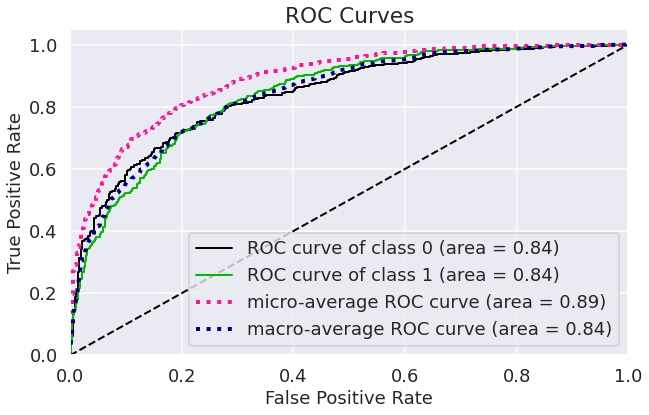

In [ ]:
!pip install scikit-plot
import scikitplot as skplt 
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

El área bajo la curva ROC (AUROC) representa la probabilidad de que el modelo distinga las observaciones entre dos clases. AUROC ofrece una medida única de cómo cambian la tasa positiva verdadera y la tasa de falsos positivos de un modelo con diferentes valores. Cuanto más cercano esté el puntaje AUROC de un modelo a 1, mejor será. De la gráfica anterior, se puede señalar que amboas curvas están por encima de 0.5, lo que sugiere que ambos modelos tienen la capacidad de distinguir entre las observaciones de cada clase.
AUC es 0.84 lo que significa que hay un 84% de posibilidades de que el modelo pueda distinguir entre Churn y No Churn.

**4.5. Handling Data No Balanceada**

In [ ]:
#Reforcemos el insigh encontrado en 3.3.6
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

La tasa churn es solo alrededor del 30% de la población total de muestras. Existe un riesgo de que el modelo entrenado con estos datos solo haga predicciones a favor de la clase mayoritaria (no churn). Para equilibrar el conjunto de datos, es necesario duplicar al azar las observaciones de la clase minoritaria.

In [ ]:
from sklearn.utils import resample
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #iguales el numero de observaciones para la clase mayoritaria (no churn)
random_state=1) 
# Cimbinamos el muestreo realizado
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

**4.5.1. Regresión Logistica para la variable churn balanceada**

In [ ]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


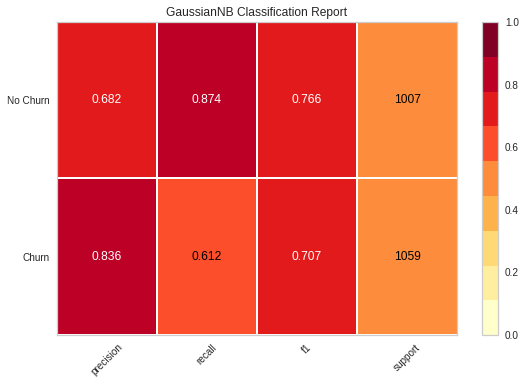

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
classes=['Churn','No Churn']
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)
visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit del modelo
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluar el modelo
g = visualizer.poof()             # Draw/show/poof de los datos

Del resultado anterior se puede ver que la precisión general del modelo ha disminuido, pero la precisión y los puntajes de recuperación para predecir una rotación han mejorado. El soporte es el número de ocurrencias reales de la clase en el conjunto de datos especificado. El soporte desequilibrado en los datos de entrenamiento puede indicar debilidades estructurales en los puntajes reportados del clasificador y podría indicar la necesidad de muestreo estratificado o reequilibrio. El soporte no cambia entre modelos, sino que diagnostica el proceso de evaluación.

La precisión del modelo para No Churn es 69% es menor que para Churn 83% pero la precisión (recall) es mayor 86% que Churn 62%. El puntaje F1 para el NoChurn es más alto 76.6%, mientras que para el Churn es del 70%. La precisión general del modelo ha disminuido, pero la precisión y los puntajes de recuperación para predecir un abandono han mejorado en este modelo.

**4.5.2. Comparación de predictibilidad de los modelos balanceados y no balanceados a través del AUROC**

In [ ]:
from sklearn.metrics import roc_auc_score

# Obteniendo la probabilidad de clases para ambos modelos
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)

# Probabilidades de positivos
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.84082496855118
Balanced model AUROC: 0.75643066991869


Los puntajes de AUROC son mayores a 50% en ambos modelos. El modelo desequilibrado es mayor a 80%. Esto sugiere que ambos modelos tienen la capacidad de distinguir entre observaciones de cada clase.

**4.5.3. Validación Cruzada K-FOLD**

La validación cruzada k-fold se utiliza para estimar la habilidad del modelo. En cada pliegue, divide los datos en un conjunto de entrenamiento y un conjunto de prueba se ajusta al conjunto de entrenamiento y se evalúa a sí mismo en el conjunto de prueba usando la medida de concordancia por defecto. Como se observa el modelo ha proporcionado un 80% de precisión.

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluando el modelo usando un K-FOLD de 10
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.84 0.8  0.8  0.82]
Mean of scores:  0.8035580867619452


**5. Analisis de Supervivencia (Survival Analysis)**

¿Por qué un analisis de Supervivencia? En cualquier grupo de clientes lo suficientemente grande como Telecom, habrá personas que tengan los mismos atributos / características. Algunos de ellos abandonarán y otros no, y lo que idealmente quiere saber la compañía de telecomunicaciones es la probabilidad de abandono para cada grupo. Esto es lo que proporciona la regresión logística. Pero no está claro para qué escala de tiempo está prediciendo. Por lo tanto, se recurre al análisis de supervivencia para este propósito.

Para cada cliente, se requieren dos puntos de datos importantes para el análisis de supervivencia

1.   'Tenure': cuánto tiempo han sido clientes cuando se observan los datos 
2.   'Churn': si el cliente se fue o no cuando se observaron los datos


In [ ]:
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


**5.1. Modelo Kaplan - Meier**

In [ ]:
!pip install lifelines
import lifelines
from lifelines import KaplanMeierFitter
# Ajustando los datos para la función Kaplan - Meier
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

     |████████████████████████████████| 348kB 2.9MB/s 


<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

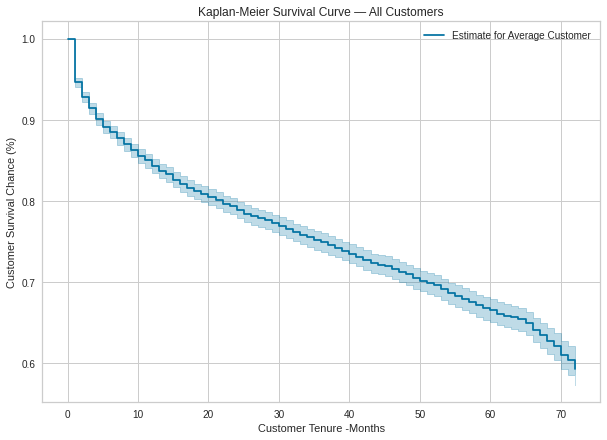

In [ ]:
# Plot de la función de supervivencia de Kaplan Meier
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

El gráfico anterior, proporciona una intuición básica sobre los clientes. Si no situamos al inicio del gráfico, dentro de 1-2 años, la compañía retuvo casi el 80-90% de sus clientes, pero hay una disminución constante y después de más de 70 meses, la compañía puede retener casi el 60% de sus clientes. Esta entrada es bastante útil para que la compañía de telecomunicaciones comprenda la tendencia y el pronóstico comercial, pero ¿Que hay de las otras variables?, para ello utilizaremos el Modelo de Riesgos Proporcionales de Cox.


**5.2. Modelo de Riesgos Proporcionales de Cox**


Este es un modelo de regresión de supervivencia. Los "peligros" pueden pensarse en algo que aumentaría / disminuiría las posibilidades de retención de clientes. Un peligro puede ser el tipo de contrato que tiene un cliente, los clientes con contratos de varios años probablemente cancelen con menos frecuencia que aquellos con contratos de mes a mes. Una restricción es que el modelo asume una proporción constante de riesgos a lo largo del tiempo entre los grupos.

In [ ]:
a = pd.read_csv('https://raw.githubusercontent.com/JLaura011/Business-Analytics/master/Telco-Customer-Churn.csv')
a.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [ ]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [ ]:
#Relabel de las variables
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

,SeniorCitizen,tenure,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,Churn_Yes
0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,29.85,29.85,0
1,0,34,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,56.95,1889.50,0
2,0,2,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,53.85,108.15,1
3,0,45,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,42.30,1840.75,0
4,0,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,70.70,151.65,1


In [ ]:
#Para la prueba de Cox, la columna Churn es la observación de eventos  
#Asimismo necesitamos dividir el conjunto de datos en dos (train y test)
from lifelines import CoxPHFitter
from scipy.special import logsumexp
cph_train, cph_test = train_test_split(a, test_size=0.2)
# Usando el modelo Cox Proportional Hazards
cph = CoxPHFitter()   
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)  
cph.print_summary(model="telecom churn prediction variables", decimals=3)    

En la regresión anterior, la salida clave es exp (coef). Esto se interpreta como la escala del riesgo de peligro para cada unidad adicional de la variable, siendo 1.00 neutral.

> Clientes cuya verificación PaymentMethod_Electronic tienen más probabilidades de abandono; del mismo modo, es más probable que los clientes de facturación electrónica cancelen su servicio (1.12 veces). 

> El servicio de Internet (DSL y fibra), el contrato (1 y 2 años), el método de pago y los cargos totales juegan un papel importante en la predicción de la rotación, mientras que todas las demás covariables no son significativas.

> Un punto interesante a tener en cuenta aquí es que, los valores de los coeficientes (coef) en el caso de covariables TotalCharges es cercano cero, pero aún así TotalCharges juega un papel importante en la predicción de abandono. La razón es que el Cargo mensual es un valor continuo y puede variar del orden de decenas, cientos a miles, cuando se multiplica por el coeficiente pequeño (β = -0.01), se vuelve significativo.

> Obtenemos la concordancia (0.929 = 0.93). Esta es una evaluación de la consistencia interna del modelo. La concordancia de 0,93 sugiere un buen modelo. La puntuación de concordancia evalúa las clasificaciones relativas de los tiempos de eventos del sujeto, es decir, podemos multiplicar por una constante positiva, o agregar una constante, y las clasificaciones no cambiarán



Text(0.5, 1.0, 'Coeficientes por Intervalos de Confianza')

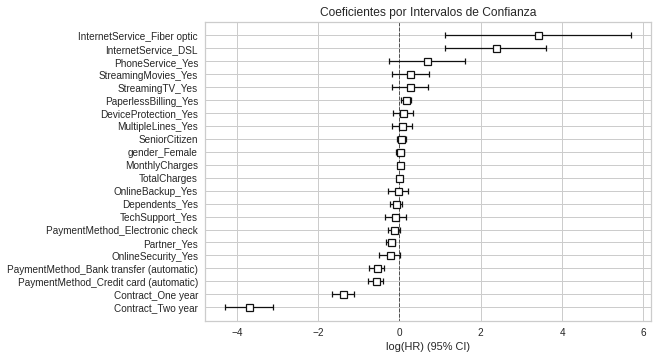

In [ ]:
#De una forma gráfica
cph.plot()
plt.title('Coeficientes por Intervalos de Confianza')

Para interpretar de una forma mas clara esta gráfico, recordemos que si un coeficiente (coef) fuese positivo, entonces el factor exp (coef) sera mayor a 1, lo que desacelerará el tiempo del evento siendo asi de efecto protector. Por el contrario, un coeficiente negativo acelerará el tiempo del evento, reducirá el tiempo medio / medio de supervivencia siendo de un efecto riesgoso. Basado en ello,  las características más significativas que impactan positivamente en la supervivencia.

     - Contrato de 2 años
     - Contrato de 1 año
     - Pago con tarjeta de crédito
     - pago por transferencia bancaria

Las partes interesadas deben comprender cuánto pueden gastar para mantener a los clientes y comparar sus tasas de supervivencia con clientes similares a ellos, que en cambio tienen cada una de estas cuatro características presente

